In [2]:
with open('data.txt', 'r') as f:
    data = f.read()

In [3]:
from google.cloud import bigquery
import requests
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "key-vlille.json"
client = bigquery.Client()

# Configuration de Google Maps
with open('GOOGLE_MAPS_API_KEY.txt', 'r') as f:
    GOOGLE_MAPS_API_KEY = f.read()

client = bigquery.Client()


query = """
  \t\t\tSELECT nom, nbvelosdispo, datemiseajour
        FROM `vlille-396911.flask_dataset.data_rm_duplicate` 
        WHERE 
            datemiseajour >= TIMESTAMP('2023-08-25') 
        AND datemiseajour <  TIMESTAMP('2023-08-26')
        AND libelle = 2
        ORDER BY libelle, datemiseajour ASC
        """

# Run the BigQuery query
query_job = client.query(query)
results = query_job.result()

# Process and return the results as needed

data = [(row.datemiseajour, row.nbvelosdispo) for row in results]
x_values = [row[0] for row in data]
y_values = [row[1] for row in data]
# save data to file
with open('data.txt', 'w') as f:
    f.write(str(data))

print(data)

[(datetime.datetime(2023, 8, 25, 0, 0, 15, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 1, 19, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 2, 17, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 3, 17, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 4, 17, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 5, 16, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 6, 17, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 7, 17, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 8, 17, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 9, 16, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 10, 17, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 11, 16, tzinfo=datetime.timezone.utc), 16), (datetime.datetime(2023, 8, 25, 0, 12, 16, tzinfo=datetime.ti

In [6]:
def allo():
    stations_infos = get_realtime_data()
    general_infos = {
        "nb_velos_dispo":           sum([station["nb_velos_dispo"] for station in stations_infos]),
        "nb_places_dispo":          sum([station["nb_places_dispo"] for station in stations_infos]),
        "nb_stations_vides":        sum([(station["nb_velos_dispo"] == 0) and (station['etat'] == "EN SERVICE") for station in stations_infos]),
        "nb_stations_pleines":      sum([(station["nb_places_dispo"] == 0) and (station['etat'] == "EN SERVICE") for station in stations_infos]),
        "nb_stations_nbvelos_sup_to_0": sum([station["nb_velos_dispo"] > 0 for station in stations_infos]),
        "nb_stations_nbplaces_sup_to_0": sum([station["nb_places_dispo"] > 0 for station in stations_infos]),
        "nb_stations_en_service":   sum([station["etat"] == "EN SERVICE" for station in stations_infos]),
        "nb_stations_en_maintenance": sum([station["etat"] == "IN_MAINTENANCE" for station in stations_infos]),
        "nb_stations_reformees":    sum([station["etat"] == "RÉFORMÉ" for station in stations_infos]),        
        "nb_sations_connectees":    sum([station["etat_connexion"] == "CONNECTÉE" for station in stations_infos]),
        "nb_sations_deconnectees":  sum([station["etat_connexion"] == "DÉCONNECTÉ" for station in stations_infos])
    }

    return stations_infos, general_infos


def get_realtime_data():  
    response = requests.get("https://opendata.lillemetropole.fr/api/records/1.0/search/?dataset=vlille-realtime&rows=300")
    records = response.json()["records"]

    data = []
    for record in records:
        station = {}
        station["nom"] = record["fields"]["nom"]
        station["libelle"] = record["fields"]["libelle"]
        station["adresse"] = record["fields"]["adresse"]
        station["commune"] = record["fields"]["commune"]
        station["type"] = record["fields"]["type"]
        station["latitude"] = record["fields"]["localisation"][0]
        station["longitude"] = record["fields"]["localisation"][1]
        station["etat"] = record["fields"]["etat"]
        station["nb_velos_dispo"] = record["fields"]["nb_velos_dispo"]
        station["nb_places_dispo"] = record["fields"]["nbplacesdispo"]
        station["etat_connexion"] = record["fields"]["etatconnexion"]
        station["derniere_maj"] = record["fields"]["datemiseajour"]
        data.append(station)
    
    return data

In [11]:
stations_infos = get_realtime_data()

In [17]:
[{"nom": station['nom'], "nb_velos_dispo": station['nb_velos_dispo']} for station in stations_infos if station['nb_velos_dispo'] == 0 and station['etat'] == "EN SERVICE"]

[{'nom': 'RÉSISTANCE', 'nb_velos_dispo': 0},
 {'nom': 'PARC BARBIEUX', 'nb_velos_dispo': 0},
 {'nom': 'HOTEL DE POLICE', 'nb_velos_dispo': 0},
 {'nom': 'SQUARE DES MERES', 'nb_velos_dispo': 0},
 {'nom': 'AVENUE DE MORMAL', 'nb_velos_dispo': 0},
 {'nom': 'HOPITAL VICTOR PROVO', 'nb_velos_dispo': 0},
 {'nom': 'METRO GAMBETTA', 'nb_velos_dispo': 0},
 {'nom': 'NATIONALE RUE DU PORT', 'nb_velos_dispo': 0},
 {'nom': 'BOIS HABITE', 'nb_velos_dispo': 0},
 {'nom': "JEANNE D'ARC", 'nb_velos_dispo': 0},
 {'nom': 'LE CORBUSIER', 'nb_velos_dispo': 0},
 {'nom': 'TEST CYKLEO LILLE', 'nb_velos_dispo': 0},
 {'nom': 'VICTOIRE', 'nb_velos_dispo': 0},
 {'nom': 'CONDITION PUBLIQUE', 'nb_velos_dispo': 0},
 {'nom': 'GARE JEAN LEBAS', 'nb_velos_dispo': 0},
 {'nom': 'RUE DES POUTRAINS', 'nb_velos_dispo': 0},
 {'nom': 'CARLIERS', 'nb_velos_dispo': 0}]

In [14]:
def get_transactions():
    # bigquery query that list all the transactions in a table (schéma : date datetime, nom string, libelle int, value int):
    query = f"""
            WITH RankedTransactions AS (
            SELECT
                nom,
                datemiseajour AS date,
                nb_velos_dispo AS nb_velos_dispo_current,
                LAG(nb_velos_dispo, 1) OVER (PARTITION BY nom ORDER BY datemiseajour) AS nb_velos_dispo_previous
            FROM
                `vlille-396911.flask_dataset.data_rm_duplicate`
            
            WHERE datemiseajour >= '2023-09-06' and datemiseajour <'2023-09-07' 
            )

            SELECT
                nom,
                date,
                IFNULL(nb_velos_dispo_previous, 0) - nb_velos_dispo_current AS transaction_value
            FROM
                RankedTransactions
            WHERE
                nb_velos_dispo_previous IS NOT NULL
                and (IFNULL(nb_velos_dispo_previous, 0) - nb_velos_dispo_current) <> 0
            ORDER BY
                date DESC
            LIMIT 5
            """
    # Run the BigQuery query
    query_job = client.query(query)
    results = query_job.result()

    # Process and return the results as needed
    data = [{
                "date": row.date.strftime("%Y-%m-%d %H:%M:%S"),
                "nom": row.nom,
                "value": row.transaction_value if row.transaction_value < 0 else "+" + str(row.transaction_value)
            } for row in results]

    return data

In [51]:
get_transactions()

[{'date': '2023-09-06 23:59:10', 'nom': 'BRULE MAISON', 'value': '+1'},
 {'date': '2023-09-06 23:59:10', 'nom': 'MARCHE DE WAZEMMES', 'value': '+1'},
 {'date': '2023-09-06 23:59:10', 'nom': 'GARE LILLE EUROPE', 'value': '+1'},
 {'date': '2023-09-06 23:59:10', 'nom': 'MOLINEL', 'value': -1},
 {'date': '2023-09-06 23:59:10', 'nom': 'LA MAILLERIE', 'value': '+1'}]

In [38]:
import pandas as pd

def avg_bars(week_day):
    # Define the start and end dates
    start_date = pd.Timestamp('2023-08-25')
    end_date = pd.Timestamp('2023-09-15')

    # Create a list of days of the week in order
    days_of_week = ['Dimanche', 'Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi']
    day_index = days_of_week.index(week_day)

    query = f"""
    SELECT
        EXTRACT(HOUR FROM datemiseajour) AS hour_of_day,
        AVG(nbvelosdispo) AS avg_nbvelosdispo
    FROM
        `vlille-396911.flask_dataset.data_rm_duplicate`
    WHERE
        datemiseajour >= TIMESTAMP('{start_date.date()}')
        AND datemiseajour < TIMESTAMP('{end_date.date()}')
        AND libelle = 66
        AND EXTRACT(DAYOFWEEK FROM datemiseajour) = {day_index + 1}
    GROUP BY
        hour_of_day
    ORDER BY
        hour_of_day
    """
    
    # Run the BigQuery query
    query_job = client.query(query)
    results = query_job.result()

    data = [(row.hour_of_day, row.avg_nbvelosdispo) for row in results]
    response_data = {
        'labels': [row[0] for row in data],
        'values': [row[1] for row in data]
    }

    return response_data

In [39]:
d = avg_bars('Lundi')

In [40]:
d

{'labels': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 'values': [2.5108695652173916,
  2.6265060240963853,
  2.0631578947368423,
  1.8800000000000001,
  2.3026315789473686,
  4.544303797468355,
  4.317073170731708,
  7.486486486486486,
  7.741176470588234,
  6.8,
  5.6911764705882355,
  6.413793103448277,
  9.323809523809528,
  10.120000000000001,
  11.96629213483146,
  10.865979381443298,
  12.011363636363637,
  10.063291139240505,
  9.784090909090912,
  10.872093023255815,
  10.373626373626372,
  10.530303030303031,
  8.516129032258066,
  8.164835164835164]}

In [2]:
week_day = 'Mercredi'
days_of_week = {'Dimanche': 1, 'Lundi': 2, 'Mardi': 3, 'Mercredi': 4, 'Jeudi': 5, 'Vendredi': 6, 'Samedi': 7}
day_index = days_of_week[week_day]
print(day_index)

4


In [11]:
from google.cloud import bigquery
from datetime import datetime, timedelta
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "app/key-vlille.json"

client = bigquery.Client()

def handle_marker_click(station_libelle, nb_days_ago):

    # Get the current date and time
    # current_datetime = current_datetime = datetime.utcnow() + timedelta(hours=2) # Paris timezone utc+2
    current_datetime = datetime(2023, 9, 15, 12, 0)
    # Calculate the datetime 24 hours ago from now
    twenty_four_hours_ago = twenty_four_hours_ago = current_datetime - timedelta(hours=24*int(nb_days_ago))
    # strftime() converts datetime objects to strings
    # current_datetime = current_datetime.strftime('%Y-%m-%d %H:%M')
    # twenty_four_hours_ago = twenty_four_hours_ago.strftime('%Y-%m-%d %H:%M')

    print('**********************')
    print('current_datetime: ', current_datetime)
    print('twenty_four_hours_ago: ', twenty_four_hours_ago)
    print('**********************')

    query = f"""
            SELECT nom, nbvelosdispo, datemiseajour
            FROM `vlille-396911.flask_dataset.data_rm_duplicate` 
            WHERE 
                datemiseajour >= TIMESTAMP('{twenty_four_hours_ago}')
            AND datemiseajour <  TIMESTAMP('{current_datetime}')
            AND libelle = {station_libelle}
            ORDER BY libelle, datemiseajour ASC
            """
    
    # Run the BigQuery query
    query_job = client.query(query)
    results = query_job.result()

    # Process and return the results as needed
    data = [(row.datemiseajour, row.nbvelosdispo) for row in results]
    response_data = {
        'labels': [row[0] for row in data],
        'values': [row[1] for row in data]
    }
    return (response_data)

In [23]:
# Create or replace transactions_test table
# nom, libelle, date,value

query = """
CREATE OR REPLACE TABLE `vlille-gcp.vlille_gcp_dataset.transactions_test` AS
WITH RankedTransactions AS (
  SELECT
    station_id,
    record_timestamp AS date,
    nb_velos_dispo AS nbvelosdispo_current,
    LAG(nb_velos_dispo, 1) OVER (PARTITION BY station_id ORDER BY record_timestamp) AS nbvelosdispo_previous
  FROM
    `vlille-gcp.vlille_gcp_dataset.records`
  
  WHERE DATE(record_timestamp) >= '2023-08-25' 
)

SELECT
  station_id,
  date,
  IFNULL(nbvelosdispo_previous, 0) - nbvelosdispo_current AS transaction_value
FROM
  RankedTransactions
WHERE
  nbvelosdispo_previous IS NOT NULL
  and (IFNULL(nbvelosdispo_previous, 0) - nbvelosdispo_current) <> 0
ORDER BY
  date DESC;
  """

# Run the BigQuery query
query_job = client.query(query)
results = query_job.result()
results

In [16]:
import  pandas as pd

query = """
SELECT *
    FROM `vlille-gcp.vlille_gcp_dataset.transactions_test`
    ORDER BY date DESC
    LIMIT 5
"""

client.query(query).result().to_dataframe()

,station_id,date,transaction_value
0,5,2023-09-04 23:53:00.574000+00:00,1
1,44,2023-09-04 23:53:00.574000+00:00,2
2,35,2023-09-04 23:52:02.889000+00:00,1
3,161,2023-09-04 23:52:02.889000+00:00,-1
4,174,2023-09-04 23:52:02.889000+00:00,-1


In [1]:
from google.cloud import bigquery
from datetime import datetime, timedelta
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "app/key-vlille-gcp.json"

client = bigquery.Client()

In [9]:
get_avg_bars(3,'Lundi')

day_index:  2


{'labels': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 'values': [5.410614525139666,
  5.4692737430167595,
  5.499999999999999,
  5.473389355742297,
  5.8743169398907105,
  7.613832853025937,
  11.28611111111111,
  12.427374301675977,
  12.963788300835654,
  13.047222222222219,
  12.864788732394366,
  11.835654596100282,
  12.07242339832869,
  10.860724233983285,
  8.369444444444445,
  5.499999999999999,
  1.885793871866295,
  3.1694444444444443,
  3.8659217877094973,
  5.529247910863511,
  6.325905292479106,
  6.287292817679558,
  4.177464788732395,
  3.2]}

In [8]:
def get_avg_bars(libelle, week_day):
    # Define the start and end dates
    start_date  = datetime(2023, 8, 25)
    end_date    = datetime.utcnow()

    # Create a list of days of the week in order
    days_of_week = {'Dimanche': 1, 'Lundi': 2, 'Mardi': 3, 'Mercredi': 4, 'Jeudi': 5, 'Vendredi': 6, 'Samedi': 7}
    day_index = days_of_week[week_day]
    print('day_index: ', day_index)

    query = f"""
    SELECT
        EXTRACT(HOUR FROM record_timestamp) AS hour_of_day,
        AVG(nb_velos_dispo) AS avg_nb_velos_dispo
    FROM
        `vlille-gcp.vlille_gcp_dataset.records`
    WHERE
        record_paris_paris_timestamp >= TIMESTAMP('{start_date.date()}')
        AND record_timestamp < TIMESTAMP('{end_date.date()}')
        AND station_id = {libelle}
        AND EXTRACT(DAYOFWEEK FROM record_timestamp) = {day_index}
    GROUP BY
        hour_of_day
    ORDER BY
        hour_of_day
    """
    
    # Run the BigQuery query
    try:
        query_job = client.query(query)
        results = query_job.result()
        data = [(row.hour_of_day, row.avg_nb_velos_dispo) for row in results]
        response_data = {
            'labels': [row[0] for row in data],
            'values': [row[1] for row in data]
        }
        return response_data
    except Exception as e:
        print('Error: ', e)
        return None



In [11]:
def transactions_count():
    today = datetime.utcnow()
    query = f"""
              WITH RankedTransactions AS (
                SELECT
                  station_id,
                  EXTRACT(HOUR FROM date) AS hour_of_day,
                  transaction_value
                FROM
                  `vlille-gcp.vlille_gcp_dataset.transactions_test`
                WHERE
                  DATE(date) = '{today.strftime('%Y-%m-%d')}'
              )

              SELECT
                hour_of_day,
                SUM(IF(transaction_value > 0, transaction_value, 0)) AS sum_positive_transactions,
                SUM(IF(transaction_value < 0, - transaction_value, 0)) AS sum_negative_transactions,
                COUNT(transaction_value) AS transactions_count
              FROM
                RankedTransactions
              GROUP BY
                hour_of_day
              ORDER BY
                hour_of_day;
            """
    
    # Run the BigQuery query
    query_job = client.query(query)
    results = query_job.result()

    # Process and return the results as needed
    data = [(row.hour_of_day, row.sum_positive_transactions, row.sum_negative_transactions, row.transactions_count) for row in results]
    while len(data) < 24:
        data.append((len(data), 0, 0, 0))
      
    response_data = {
        'labels': [row[0] for row in data],
        'values': [row[1] for row in data],
        'values2': [row[2] for row in data],
        'values3': [row[3] for row in data]
    }
    return (response_data)

transactions_count()

{'labels': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 'values': [45,
  58,
  29,
  84,
  191,
  695,
  829,
  625,
  306,
  375,
  658,
  615,
  433,
  468,
  573,
  884,
  805,
  165,
  0,
  0,
  0,
  0,
  0,
  0],
 'values2': [46,
  64,
  30,
  68,
  171,
  523,
  725,
  795,
  349,
  347,
  649,
  565,
  465,
  509,
  519,
  840,
  796,
  202,
  0,
  0,
  0,
  0,
  0,
  0],
 'values3': [85,
  103,
  55,
  100,
  220,
  758,
  1059,
  885,
  443,
  503,
  921,
  886,
  625,
  707,
  772,
  1228,
  1030,
  260,
  0,
  0,
  0,
  0,
  0,
  0]}

In [12]:
def sum_nbvelosdispo():
    # get the today date without the hours
    today = datetime.utcnow().date()
    query = f"""
            SELECT record_timestamp, sum(nb_velos_dispo) AS total_velos
            FROM `vlille-gcp.vlille_gcp_dataset.records`
            WHERE 
                DATE(record_timestamp) >= '{today}'
            GROUP BY record_timestamp
                HAVING total_velos > 1500 AND total_velos < 2300
            ORDER BY record_timestamp ASC;
            """
    
    # Run the BigQuery query
    query_job = client.query(query)
    results = query_job.result()

    # Process and return the results as needed
    # data = [(row.datemiseajour, row.total_nbvelosdispo) for row in results]
    data = [(row.record_timestamp, row.total_velos) for row in results if row.total_velos > 1500 and row.total_velos < 2300]
    response_data = {
        'labels': [row[0] for row in data],
        'values': [row[1] for row in data]
    }
    return (response_data)

In [2]:
def transactions_count():
    today = datetime.utcnow()
    query = f"""
              WITH RankedTransactions AS (
                SELECT
                  station_id,
                  EXTRACT(HOUR FROM date) AS hour_of_day,
                  transaction_value
                FROM
                  `vlille-gcp.vlille_gcp_dataset.transactions_test`
                WHERE
                  DATE(date) = '{today.strftime('%Y-%m-%d')}'
              )

              SELECT
                hour_of_day,
                SUM(IF(transaction_value > 0, transaction_value, 0)) AS sum_positive_transactions,
                SUM(IF(transaction_value < 0, - transaction_value, 0)) AS sum_negative_transactions,
              FROM
                RankedTransactions
              GROUP BY
                hour_of_day
              ORDER BY
                hour_of_day;
            """
    
    # Run the BigQuery query
    query_job = client.query(query)
    results = query_job.result()

    # Process and return the results as needed
    data = [(row.hour_of_day, row.sum_positive_transactions, row.sum_negative_transactions) for row in results]
    while len(data) < 24:
        data.append((len(data), 0, 0, 0))
      
    response_data = {
        'labels': [row[0] for row in data],
        'values': [row[1] for row in data],
        'values2': [row[2] for row in data]
    }
    return (response_data)


def todays_transactions_count():
    data = transactions_count()
    sum = 0
    for i in range(0, len(data['values'])):
        sum += data['values'][i] + data['values2'][i]
    return sum


In [4]:
transactions_count()

{'labels': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 'values': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'values2': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

0

In [7]:
def get_realtime_data(station_libelle=None):
    response = requests.get("https://opendata.lillemetropole.fr/api/records/1.0/search/?dataset=vlille-realtime&rows=300")
    records = response.json()["records"]

    data = []
    for record in records:
        # Check if station_libelle is specified and matches the current station's libelle
        if station_libelle and record["fields"]["libelle"].lower() != station_libelle.lower():
            continue
        
        station = {}
        station["nom"] = record["fields"]["nom"]
        station["libelle"] = record["fields"]["libelle"]
        station["adresse"] = record["fields"]["adresse"]
        station["commune"] = record["fields"]["commune"]
        station["type"] = record["fields"]["type"]
        station["latitude"] = record["fields"]["localisation"][0]
        station["longitude"] = record["fields"]["localisation"][1]
        station["etat"] = record["fields"]["etat"]
        station["nb_velos_dispo"] = record["fields"]["nbvelosdispo"]
        station["nb_places_dispo"] = record["fields"]["nbplacesdispo"]
        station["etat_connexion"] = record["fields"]["etatconnexion"]
        station["derniere_maj"] = record["fields"]["datemiseajour"]
        station["record_timestamp"] = record["record_timestamp"]
        data.append(station)
    
    return data

In [13]:
import requests
prev_response = []

In [16]:
prev_response

[{'nom': 'RUE CHAMBORD',
  'libelle': 136,
  'adresse': 'RUE CHAMBORD',
  'commune': "VILLENEUVE D'ASCQ",
  'type': 'SANS TPE',
  'latitude': 50.62972,
  'longitude': 3.133873,
  'etat': 'RÉFORMÉ',
  'nb_velos_dispo': 0,
  'nb_places_dispo': 0,
  'etat_connexion': 'DÉCONNECTÉ',
  'derniere_maj': '2022-11-29T09:47:16+00:00',
  'record_timestamp': '2023-10-06T13:57:00.799Z'},
 {'nom': 'PAVÉ DE LILLE',
  'libelle': 270,
  'adresse': 'Rue Jean Bart',
  'commune': 'WASQUEHAL',
  'type': 'AVEC TPE',
  'latitude': 50.664211,
  'longitude': 3.130098,
  'etat': 'EN SERVICE',
  'nb_velos_dispo': 17,
  'nb_places_dispo': 3,
  'etat_connexion': 'CONNECTÉ',
  'derniere_maj': '2023-10-06T13:51:09+00:00',
  'record_timestamp': '2023-10-06T13:57:00.799Z'},
 {'nom': 'FACHES THUMESNIL MAIRIE',
  'libelle': 302,
  'adresse': 'Rue Roger Salengro',
  'commune': 'FACHES THUMESNIL',
  'type': 'AVEC TPE',
  'latitude': 50.60301,
  'longitude': 3.06925,
  'etat': 'EN SERVICE',
  'nb_velos_dispo': 7,
  'nb_plac

In [24]:
data = get_realtime_data()
for station in data:
    prev_station = [prev_station for prev_station in prev_response if prev_station['libelle'] == station['libelle']]
    if prev_station:
        prev_station = prev_station[0]
        if station['nb_velos_dispo'] != prev_station['nb_velos_dispo']:
            print(station['nom'], station['nb_velos_dispo'], prev_station['nb_velos_dispo'])
prev_response = data

In [28]:
def transactions_count():
    query = f"""
              WITH RankedTransactions AS (
                SELECT
                  station_id,
                  EXTRACT(HOUR FROM date) AS hour_of_day,
                  transaction_value
                FROM
                  `vlille-gcp.vlille_gcp_dataset.transactions_test`
                WHERE
                  DATE(date) = '2023-09-04'
              )

              SELECT
                hour_of_day,
                SUM(IF(transaction_value > 0, transaction_value, 0)) AS sum_positive_transactions,
                SUM(IF(transaction_value < 0, - transaction_value, 0)) AS sum_negative_transactions,
                COUNT(transaction_value) AS transactions_count
              FROM
                RankedTransactions
              GROUP BY
                hour_of_day
              ORDER BY
                hour_of_day;
            """
    
    # Run the BigQuery query
    query_job = client.query(query)
    results = query_job.result()

    # Process and return the results as needed
    data = [(row.hour_of_day, row.sum_positive_transactions, row.sum_negative_transactions, row.transactions_count) for row in results]
    response_data = {
        'labels': [row[0] for row in data],
        'values': [row[1] for row in data],
        'values2': [row[2] for row in data],
        'values3': [row[3] for row in data]
    }
    return (response_data)

In [30]:
def sum_nbvelosdispo():
    date_inf = datetime.utcnow() - timedelta(hours = 24)
    query = f"""
            SELECT record_timestamp, sum(nb_velos_dispo) AS total_velos
            FROM `vlille-gcp.vlille_gcp_dataset.records`
            WHERE 
                DATE(record_timestamp) >= '{date_inf.strftime('%Y-%m-%d')}'
            GROUP BY record_timestamp
                HAVING total_velos > 1500 AND total_velos < 2300
            ORDER BY record_timestamp ASC;
            """
    
    # Run the BigQuery query
    query_job = client.query(query)
    results = query_job.result()

    # Process and return the results as needed
    # data = [(row.datemiseajour, row.total_nbvelosdispo) for row in results]
    data = [(row.record_timestamp, row.total_velos) for row in results if row.total_velos > 1500 and row.total_velos < 2300]
    response_data = {
        'labels': [row[0] for row in data],
        'values': [row[1] for row in data]
    }
    return (response_data)

In [31]:
sum_nbvelosdispo()

{'labels': [datetime.datetime(2023, 10, 4, 0, 2, 6, 568000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 3, 1, 876000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 4, 1, 617000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 5, 5, 461000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 6, 1, 442000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 7, 0, 642000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 8, 0, 515000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 9, 0, 968000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 10, 0, 564000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 11, 0, 693000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 12, 0, 981000, tzinfo=datetime.timezone.utc),
  datetime.datetime(2023, 10, 4, 0, 13, 0, 434000, tzinfo=datetime.timezone.utc),
  datetime.dat

In [29]:
transactions_count()

{'labels': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 'values': [52,
  24,
  25,
  79,
  102,
  297,
  396,
  329,
  291,
  364,
  233,
  431,
  459,
  422,
  527,
  725,
  663,
  536,
  383,
  297,
  232,
  62,
  121,
  71],
 'values2': [50,
  34,
  21,
  60,
  70,
  221,
  350,
  418,
  285,
  335,
  239,
  427,
  467,
  417,
  503,
  638,
  689,
  620,
  434,
  307,
  256,
  44,
  172,
  83],
 'values3': [84,
  52,
  43,
  87,
  93,
  340,
  399,
  375,
  401,
  519,
  270,
  587,
  697,
  657,
  787,
  1031,
  912,
  708,
  647,
  501,
  377,
  88,
  237,
  134]}

In [49]:
def sum_nbvelosdispo():
    query = f"""
SELECT datemiseajour, SUM(nbvelosdispo) AS total_nbvelosdispo
FROM `vlille-396911.flask_dataset.data_rm_duplicate`
WHERE datemiseajour >= '2023-09-03' and datemiseajour <= '2023-09-10'
GROUP BY datemiseajour
HAVING total_nbvelosdispo > 1700
ORDER BY datemiseajour;
            """
    
    # Run the BigQuery query
    query_job = client.query(query)
    results = query_job.result()

    # Process and return the results as needed
    data = [(row.datemiseajour, row.total_nbvelosdispo) for row in results if row.total_nbvelosdispo > 1500]
    response_data = {
        'labels': [row[0] for row in data],
        'values': [row[1] for row in data]
    }
    return (response_data)

In [50]:
sum_nbvelosdispo()['values']

[1798,
 1810,
 1807,
 1804,
 1808,
 1805,
 1816,
 1744,
 1811,
 1816,
 1819,
 1820,
 1816,
 1814,
 1821,
 1819,
 1816,
 1816,
 1811,
 1816,
 1818,
 1818,
 1822,
 1817,
 1821,
 1823,
 1832,
 1830,
 1829,
 1824,
 1829,
 1832,
 1835,
 1854,
 1852,
 1854,
 1856,
 1858,
 1854,
 1854,
 1854,
 1850,
 1853,
 1851,
 1853,
 1855,
 1856,
 1851,
 1851,
 1848,
 1849,
 1849,
 1850,
 1852,
 1855,
 1852,
 1856,
 1852,
 1846,
 1846,
 1853,
 1852,
 1854,
 1854,
 1853,
 1854,
 1854,
 1857,
 1857,
 1854,
 1855,
 1854,
 1854,
 1853,
 1855,
 1856,
 1856,
 1854,
 1846,
 1848,
 1848,
 1843,
 1839,
 1838,
 1838,
 1837,
 1839,
 1842,
 1854,
 1855,
 1850,
 1853,
 1853,
 1853,
 1845,
 1835,
 1833,
 1834,
 1840,
 1845,
 1845,
 1845,
 1831,
 1833,
 1841,
 1838,
 1827,
 1825,
 1825,
 1821,
 1818,
 1813,
 1811,
 1815,
 1816,
 1819,
 1822,
 1818,
 1811,
 1817,
 1809,
 1807,
 1804,
 1719,
 1803,
 1805,
 1799,
 1795,
 1791,
 1791,
 1796,
 1814,
 1813,
 1811,
 1811,
 1808,
 1811,
 1809,
 1797,
 1800,
 1799,
 1800,
 1801,

In [51]:
max(sum_nbvelosdispo()['values'])

2129

In [2]:
import datetime

# get the current date and time
current_datetime = datetime.datetime.utcnow() + datetime.timedelta(hours=2) # Paris timezone utc+2
current_datetime

datetime.datetime(2023, 10, 4, 17, 16, 29, 296887)

In [4]:
import datetime

# define a start_date datetime that set to the 2023 - 08 - 25
start_date = datetime.datetime(2023, 8, 25)
end_date    = datetime.datetime.utcnow()


In [5]:
start_date

datetime.datetime(2023, 8, 25, 0, 0)

In [ ]:
from google.cloud import bigquery
from datetime import datetime
import os



client = bigquery.Client()

# Define the start and end dates
start_date  = datetime.datetime(2023, 8, 25)
end_date    = datetime.datetime.utcnow()

# Create a list of days of the week in order
days_of_week = {'Dimanche': 1, 'Lundi': 2, 'Mardi': 3, 'Mercredi': 4, 'Jeudi': 5, 'Vendredi': 6, 'Samedi': 7}
day_index = days_of_week[week_day]
print('day_index: ', day_index)

query = f"""
SELECT
    EXTRACT(HOUR FROM record_timestamp) AS hour_of_day,
    AVG(nbvelosdispo) AS avg_nbvelosdispo
FROM
    FROM `vlille-gcp.vlille_gcp_dataset.records`
WHERE
    record_timestamp >= TIMESTAMP('{start_date.date()}')
    AND record_timestamp < TIMESTAMP('{end_date.date()}')
    AND libelle = 50
    AND EXTRACT(DAYOFWEEK FROM record_timestamp) = {day_index}
GROUP BY
    hour_of_day
ORDER BY
    hour_of_day
"""

# Run the BigQuery query
query_job = client.query(query)
results = query_job.result()

data = [(row.hour_of_day, row.avg_nbvelosdispo) for row in results]
response_data = {
    'labels': [row[0] for row in data],
    'values': [row[1] for row in data]
}



In [8]:
from datetime import datetime, timedelta

todays_date = datetime.utcnow() - timedelta(hours=2)
todays_date

datetime.datetime(2023, 10, 8, 6, 33, 10, 876845)

In [3]:
from google.cloud import bigquery
from datetime import datetime, timedelta
import os
import pandas as pd

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "app/key-vlille-gcp.json"

client = bigquery.Client()

In [5]:
def sum_velos_dispos_last_24h():
    # twenty_four_hours_ago_datetime = datetime.utcnow() - timedelta(hours=24) 
    todays_date = datetime.utcnow().date()
    query = f"""
            SELECT record_timestamp, sum(nb_velos_dispo) AS total_velos
            FROM `vlille-gcp.vlille_gcp_dataset.records`
            WHERE 
                record_timestamp >= '{todays_date}'
            GROUP BY record_timestamp
                HAVING total_velos > 1500 AND total_velos < 2300
            ORDER BY record_timestamp ASC;
            """
    
    # Run the BigQuery query
    query_job = client.query(query)
    results = query_job.result()

    # Process and return the results as needed
    data = [(row.record_timestamp, row.total_velos) for row in results]
    response_data = {
        'labels': [row[0] for row in data],
        'values': [row[1] for row in data]
    }
    # return jsonify(response_data)
    return response_data

In [6]:
data = sum_velos_dispos_last_24h()
# save data to a file
with open('data_todays_bikes_sum.txt', 'w') as f:
    f.write(str(data))

In [26]:
todays_date_ptz = datetime.utcnow().date() - timedelta(hours=2)
query = f"""
        SELECT 
            TIMESTAMP_ADD(record_timestamp, INTERVAL 2 HOUR) AS record_timestamp_ptz,
            sum(nb_velos_dispo) AS total_velos
        FROM `vlille-gcp.vlille_gcp_dataset.records`
        WHERE 
            record_timestamp >= TIMESTAMP_SUB('{todays_date_ptz}', INTERVAL 2 HOUR)
        GROUP BY record_timestamp_ptz
            HAVING total_velos > 1500 AND total_velos < 2300
        ORDER BY record_timestamp_ptz ASC;
        """

# Run the BigQuery query
query_job = client.query(query)
results = query_job.result()

# Process and return the results as needed
data = [(row.record_timestamp_ptz, row.total_velos) for row in results]

In [27]:
len(data)

861

In [28]:
while data[-1][0].date() < datetime.utcnow().date() + timedelta(days=1):
    data.append((data[-1][0] + timedelta(minutes=1), 0))
data = dat

In [29]:
data[-1]

(datetime.datetime(2023, 10, 8, 23, 59, 1, 665000, tzinfo=datetime.timezone.utc),
 0)

In [15]:
from google.cloud import bigquery
from datetime import datetime, timedelta
import os
import pandas as pd

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "app/key-vlille-gcp.json"

client = bigquery.Client()

today = (datetime.utcnow() + timedelta(hours=2)).date()
print('today: ', today)
query = f"""
        SELECT TIMESTAMP_ADD(record_timestamp, INTERVAL 2 HOUR) AS paris_timestamp, 
            SUM(nb_velos_dispo) AS total_velos
        FROM 
            `vlille-gcp.vlille_gcp_dataset.records`
        WHERE 
            record_timestamp >= TIMESTAMP_SUB('{today}', INTERVAL 2 HOUR) 
        GROUP BY 
            paris_timestamp
        HAVING 
            total_velos > 1500 AND total_velos < 2300
        ORDER BY 
            paris_timestamp ASC;
        """

# Run the BigQuery query
query_job = client.query(query)
results = query_job.result()
data = [(row.paris_timestamp, row.total_velos) for row in results if row.total_velos > 1500 and row.total_velos < 2300]

today:  2023-10-20


In [16]:
df = pd.DataFrame(data, columns=['paris_timestamp', 'total_velos'])
df['paris_timestamp'] = pd.to_datetime(df['paris_timestamp']).dt.strftime('%Y-%m-%d %H:%M')
df['paris_timestamp'] = pd.to_datetime(df['paris_timestamp'])

In [17]:
def add_missing_rows(input_df):
    new_rows = []
    for index, row in input_df.iterrows():
        if index < len(input_df) - 1:
            next_row = input_df.iloc[index + 1]
            time_diff = (next_row['paris_timestamp'] - row['paris_timestamp']).total_seconds()
            if time_diff > 60:  # If the time difference is greater than 1 minute
                current_time = row['paris_timestamp']
                while (current_time + timedelta(minutes=1)) < next_row['paris_timestamp']:
                    current_time += timedelta(minutes=1)
                    new_row = {
                        'paris_timestamp': current_time,
                        'total_velos': row['total_velos']
                    }
                    new_rows.append(new_row)
    # Create a new DataFrame with missing rows
    new_df = pd.concat([input_df, pd.DataFrame(new_rows)], ignore_index=True)
    # Sort the DataFrame by 'paris_timestamp'
    new_df = new_df.sort_values(by='paris_timestamp').reset_index(drop=True)
    return new_df


In [30]:
df = pd.DataFrame(data, columns=['paris_timestamp', 'total_velos'])
df['paris_timestamp'] = pd.to_datetime(df['paris_timestamp']).dt.strftime('%Y-%m-%d %H:%M')
df['paris_timestamp'] = pd.to_datetime(df['paris_timestamp'])
df = add_missing_rows(df)
df

,paris_timestamp,total_velos
0,2023-10-20 00:00:00,2051
1,2023-10-20 00:01:00,2051
2,2023-10-20 00:02:00,2051
3,2023-10-20 00:03:00,2051
4,2023-10-20 00:04:00,2067
...,...,...
955,2023-10-20 15:55:00,2001
956,2023-10-20 15:56:00,1978
957,2023-10-20 15:57:00,1978
958,2023-10-20 15:58:00,1978


In [32]:
count = 1440 - len(df)
while count > 0:
    # add a row with timestamp+1minute, total_velos=None
    new_row = {
        'paris_timestamp': df.iloc[-1]['paris_timestamp'] + timedelta(minutes=1),
        'total_velos': None
    }

    # Concatenate the original DataFrame with the new row
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    count -= 1

In [34]:
# df to csv
df.to_csv('data_todays_bikes_sum.csv', index=False)

In [12]:
allo

'[{"paris_timestamp":1697760000000,"total_velos":2051},{"paris_timestamp":1697760060000,"total_velos":2051},{"paris_timestamp":1697760120000,"total_velos":2051},{"paris_timestamp":1697760180000,"total_velos":2051},{"paris_timestamp":1697760240000,"total_velos":2067},{"paris_timestamp":1697760300000,"total_velos":2067},{"paris_timestamp":1697760360000,"total_velos":2067},{"paris_timestamp":1697760420000,"total_velos":2067},{"paris_timestamp":1697760480000,"total_velos":2067},{"paris_timestamp":1697760540000,"total_velos":2067},{"paris_timestamp":1697760600000,"total_velos":2067},{"paris_timestamp":1697760660000,"total_velos":2067},{"paris_timestamp":1697760720000,"total_velos":2067},{"paris_timestamp":1697760780000,"total_velos":2067},{"paris_timestamp":1697760840000,"total_velos":2059},{"paris_timestamp":1697760900000,"total_velos":2059},{"paris_timestamp":1697760960000,"total_velos":2059},{"paris_timestamp":1697761020000,"total_velos":2059},{"paris_timestamp":1697761080000,"total_velo

In [48]:
response_data = {
        'labels': [row for row in df['paris_timestamp']],
        'values': [row for row in df['total_velos']]
    }

response_data

{'labels': [Timestamp('2023-10-20 00:00:00'),
  Timestamp('2023-10-20 00:01:00'),
  Timestamp('2023-10-20 00:02:00'),
  Timestamp('2023-10-20 00:03:00'),
  Timestamp('2023-10-20 00:04:00'),
  Timestamp('2023-10-20 00:05:00'),
  Timestamp('2023-10-20 00:06:00'),
  Timestamp('2023-10-20 00:07:00'),
  Timestamp('2023-10-20 00:08:00'),
  Timestamp('2023-10-20 00:09:00'),
  Timestamp('2023-10-20 00:10:00'),
  Timestamp('2023-10-20 00:11:00'),
  Timestamp('2023-10-20 00:12:00'),
  Timestamp('2023-10-20 00:13:00'),
  Timestamp('2023-10-20 00:14:00'),
  Timestamp('2023-10-20 00:15:00'),
  Timestamp('2023-10-20 00:16:00'),
  Timestamp('2023-10-20 00:17:00'),
  Timestamp('2023-10-20 00:18:00'),
  Timestamp('2023-10-20 00:19:00'),
  Timestamp('2023-10-20 00:20:00'),
  Timestamp('2023-10-20 00:21:00'),
  Timestamp('2023-10-20 00:22:00'),
  Timestamp('2023-10-20 00:23:00'),
  Timestamp('2023-10-20 00:24:00'),
  Timestamp('2023-10-20 00:25:00'),
  Timestamp('2023-10-20 00:26:00'),
  Timestamp('2023-

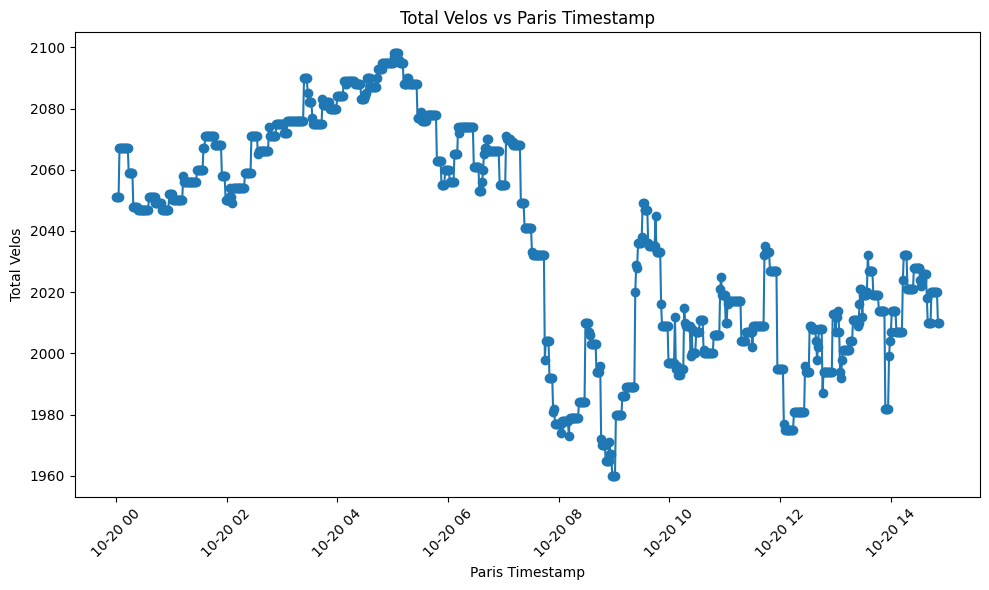

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['paris_timestamp'], df['total_velos'], marker='o')
plt.xlabel('Paris Timestamp')
plt.ylabel('Total Velos')
plt.title('Total Velos vs Paris Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()